## Machine Learning Algorithms 2023
## Homework 5: Using CNNs (80 points)




Name: Conrad, Christian-Ray

Email: conrchri@kean.edu

Kean ID: 1126666

Course: CPS 4802-01


This homework aims to enhace your understanding of the CNN using two image datasets and practice how to create custom dataset in PyTorch.

## Run each cell and save the results in Google Colab Notebook before submission. You will not get points without saving your results.

## Enable GPU support in Colab to speed up the training process.

## Your results may not exactly match my example outputs because of randomness

Tasks:

[Task 1](#section1) (60 points)

[Task 2](#section2) (20 points)


### Task 1: Create a CNN and train it on the MNIST dataset. 60 points <a id = "section1"/>

We used ANN to classify the MNIST dataset in HW4. This time, we will use CNN to classify the MNIST dataset. Please refer to the HW4 and notebooks of lecture 16 and lecture 17 for details.




### Task 1.1: Load dataset (10 points)
   - Load the training set and test set of MNIST dataset using PyTorch. training batch size = 128, test batch size = 1.
   - Resize the image to 32 * 32, Hint: transforms.Resize((32, 32))

In [1]:
# Task 1.1 Load dataset (10 points)
import torch
import numpy as np
import matplotlib.pyplot as plt #using pyplot to display images
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
# MNIST dataset, 60k 28*28 grayscale images of the 10 digits,
# along with a test set of 10k images

# 1.load data

# Don't forget to resize the image to 32*32 or your will get an error
###  "------- add your code here -------"

transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
])

train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)

# Print the number of training and test images
print(f"Number of training images: {len(train_dataset)}")
print(f"Number of test images: {len(test_dataset)}")


# 2. create the train_loader and test_loader
###  "------- add your code here -------"

train_loader = DataLoader(dataset=train_dataset, batch_size=128, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=1, shuffle=False)


100%|██████████| 9912422/9912422 [00:00<00:00, 219241861.93it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 53909966.10it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 70633746.59it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 18622217.76it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Number of training images: 60000
Number of test images: 10000


### Task 1.2: Create an Network class (20 points).
   - Build Net class: following the below structures (must follow the order):
        - Step 1: nn.Conv2d(), Think: what is input channel number, output channel number is 10, kernel size is 3, stride is 1.
        - Step 2: nn.BatchNorm2d()
        - Step 3: nn.ReLU()
        - Step 4: nn.MaxPool2d(), kernel_size=2, stride=2
        - Step 5: nn.Conv2d(), Think: what is input channel number, output channel number is 100, kernel size is 2, stride is 1.
        - Step 6: nn.BatchNorm2d()
        - Step 7: nn.ReLU()
        - Step 8: nn.MaxPool2d(), kernel_size=2, stride=2
        - Step 9: nn.Linear(), in_features=$7 \times 7 \times 100$, out_features=120
        - Step 10: nn.ReLU()
        - Step 11: nn.Linear(): in_features=120, Think: out_features=?
        - Step 12: nn.Dropout(), p=0.5
   - Create an object of Net class. n_classes = 10
   - Create a SGD optimizer. learning rate = 0.01, momentum=0.001
   - Create a cross entropy loss.
   
   

In [2]:
import torch.nn as nn
import torch.optim as optim


class Net(nn.Module):
    def __init__(self, n_classes):
        super(Net, self).__init__()
        self.feature_extractor = nn.Sequential(

            ###  "------- add your code here -------"

            # conv1
            nn.Conv2d(in_channels=1, out_channels=10, kernel_size=3, stride=1),
            # Batch Norm1
            nn.BatchNorm2d(10),
            # ReLU1
            nn.ReLU(),
            # MaxPool1
            nn.MaxPool2d(kernel_size=2, stride=2),
            # conv2
            nn.Conv2d(in_channels=10, out_channels=100, kernel_size=2, stride=1),
            # Batch Norm2
            nn.BatchNorm2d(100),
            # ReLU2
            nn.ReLU(),
            # MaxPool2
            nn.MaxPool2d(kernel_size=2, stride=2),
        )

        self.classifier = nn.Sequential(

            ###  "------- add your code here -------"

            # Linear1
            nn.Linear(in_features=7 * 7 * 100, out_features=120),
            # ReLU
            nn.ReLU(),
            # Linear2
            nn.Linear(in_features=120, out_features=n_classes),
            # Dropout
            nn.Dropout(p=0.5),
        )


    def forward(self, x):
        ###  "------- add your code here -------"
        x = self.feature_extractor(x)
        x = x.view(-1, 7 * 7 * 100)  # Flatten the output for fully connected layers
        x = self.classifier(x)
        return x

# Create an object of the network
###  "------- add your code here -------"

net = Net(n_classes=10)

# optimizer
###  "------- add your code here -------"

optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.001)

# loss
###  "------- add your code here -------"

criterion = nn.CrossEntropyLoss()

### Task 1.3: Essay questions and calculation questions (Please use the following cell to answer questions. Your answers should be in comments) (10 points).¶
   - The Net class created in task 1.2 has the following structure. Please use this structure to answer question 1 to question 5
        - Step 1: nn.Conv2d(), Think: what is input channel number, output channel number is 10, kernel size is 3, stride is 1.
        - Step 2: nn.BatchNorm2d()
        - Step 3: nn.ReLU()
        - Step 4: nn.MaxPool2d(), kernel_size=2, stride=2
        - Step 5: nn.Conv2d(), Think: what is input channel number, output channel number is 100, kernel size is 2, stride is 1.
        - Step 6: nn.BatchNorm2d()
        - Step 7: nn.ReLU()
        - Step 8: nn.MaxPool2d(), kernel_size=2, stride=2
        - Step 9: nn.Linear(), in_features=$7 \times 7 \times 100$, out_features=120
        - Step 10: nn.ReLU()
        - Step 11: nn.Linear(): in_features=120, Think: out_features=?
        - Step 12: nn.Dropout(), p=0.5

   - Question1: What is the input channel number of the Step 1: nn.Conv2d() and why
   - Question2: If the input image is $32 \times 32$. What is size of the output convolutional feature after Step 1. Hint: Slides of Lecture 15: page 40.
   - Question3: What is size of the output feature after Step 4: nn.MaxPool2d(), kernel_size=2, stride=2
   - Question4: Why the input feature number of Step 9 is $7 \times 7 \times 100$
   - Question5: What is the output_feature number in Step 11 and why
  

In [3]:
# Question 1: What is the input channel number of the Step 1: nn.Conv2d() and why

# Answer:The input channel number of the first nn.Conv2d() layer (Step 1) is 1.
# This is because MNIST images are grayscale, so they have only one channel.

# Question 2: If the input image is 32*32. What is size of the output convolutional
# feature after Step 1.
# Hint: Slides of Lecture 13: page 40.

# Answer: The formula to calculate the output size after a convolutional layer is given by:
# Output size = [(Input size − Kernel size + (2×Padding))/Stride] + 1
# For Step 1:
# Output size = [(32 − 3 + (2×0))/1] + 1 = 30
# So, the size of the output convolutional feature after Step 1 is 30 × 30


# Question 3: What is size of the output feature after Step 4: nn.MaxPool2d(), kernel_size=2, stride=2

# Answer:The max pooling layer with kernel_size=2 and stride=2 will reduce the
# size by a factor of 2. Therefore, after Step 4, the size of the output feature
# will be 30/2 × 30/2, resulting in a 15 × 15 feature map.


# Question 4: Why the input feature number of Step 9 is 7 * 7 * 100

# Answer:The size of the output feature after Step 8 (nn.MaxPool2d()) is 7×7×100.
# This is because the previous layer (Step 8) reduces the size to 15×15, and the
# subsequent fully connected layer (Step 9: nn.Linear()) expects a flattened input
# of 7×7×100.


# Question 5: What is the output_feature number in Step 11 and why

# Answer:The output feature number in Step 11 (nn.Linear()) is the out_features
# parameter, which is 10 (assuming n_classes = 10 This is because the final
# output of the neural network represents the class scores for the 10 classes in
# the MNIST dataset, so there are 10 output features.



### Task 1.4: Training the network and draw figures (10 points).¶
Hint: it may take a very long time, please be patient

   - Train 10 epochs, print the average training loss in each epoch. (4 points)
   - Hint: remember to use model.train() and model.eval() in the training phase and test phase
   - Draw a curve for the average training loss in 10 epochs (3 points).
   - Draw a curve for the average test loss in 10 epochs (3 points).
   
   
   

Epoch 1/10, Training Loss: 1.1297
Epoch 1/10, Test Loss: 0.2384
Epoch 2/10, Training Loss: 0.9447
Epoch 2/10, Test Loss: 0.1352
Epoch 3/10, Training Loss: 0.9235
Epoch 3/10, Test Loss: 0.1106
Epoch 4/10, Training Loss: 0.9052
Epoch 4/10, Test Loss: 0.0907
Epoch 5/10, Training Loss: 0.8995
Epoch 5/10, Test Loss: 0.0820
Epoch 6/10, Training Loss: 0.8848
Epoch 6/10, Test Loss: 0.0710
Epoch 7/10, Training Loss: 0.8798
Epoch 7/10, Test Loss: 0.0635
Epoch 8/10, Training Loss: 0.8805
Epoch 8/10, Test Loss: 0.0616
Epoch 9/10, Training Loss: 0.8772
Epoch 9/10, Test Loss: 0.0601
Epoch 10/10, Training Loss: 0.8738
Epoch 10/10, Test Loss: 0.0552


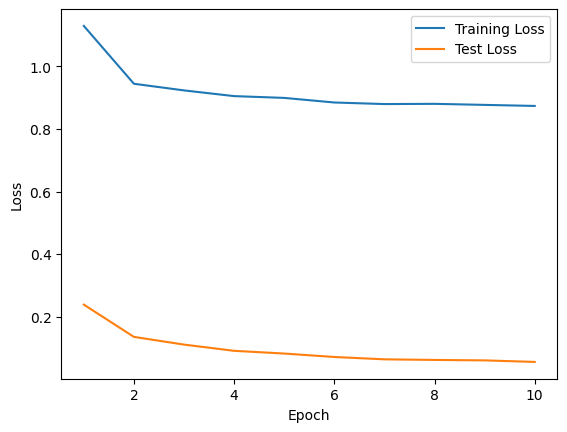

In [6]:
# train the CNN and draw curves

###  "------- add your code here -------"

# Function to train the model for one epoch
def train_epoch(model, train_loader, criterion, optimizer, device):
    model.train()
    running_loss = 0.0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    average_loss = running_loss / len(train_loader)
    return average_loss

# Function to evaluate the model on the test set
def evaluate_model(model, test_loader, criterion, device):
    model.eval()
    running_loss = 0.0

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)

            running_loss += loss.item()

    average_loss = running_loss / len(test_loader)
    return average_loss

# Function to plot the training and test loss curves
def plot_losses(train_losses, test_losses):
    plt.plot(range(1, len(train_losses) + 1), train_losses, label='Training Loss')
    plt.plot(range(1, len(test_losses) + 1), test_losses, label='Test Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# Move the model to the GPU
net.to(device)

# Training parameters
epochs = 10
train_losses = []
test_losses = []

for epoch in range(epochs):
    # Training
    train_loss = train_epoch(net, train_loader, criterion, optimizer, device)
    print(f"Epoch {epoch + 1}/{epochs}, Training Loss: {train_loss:.4f}")
    train_losses.append(train_loss)

    # Evaluation on the test set
    test_loss = evaluate_model(net, test_loader, criterion, device)
    print(f"Epoch {epoch + 1}/{epochs}, Test Loss: {test_loss:.4f}")
    test_losses.append(test_loss)

# Plotting the loss curves
plot_losses(train_losses, test_losses)




### Task 1.5: Calculate the accuacy on test dataset (10 points).¶

In [7]:
# get the accuracy

###  "------- add your code here -------"

def calculate_accuracy(model, data_loader, device):
    model.eval()
    correct_predictions = 0
    total_samples = 0

    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)

            # Calculate accuracy
            _, predicted = torch.max(outputs, 1)
            correct_predictions += (predicted == labels).sum().item()
            total_samples += labels.size(0)

    accuracy = correct_predictions / total_samples
    return accuracy

test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1, shuffle=False)

# Calculate accuracy on the test set
test_accuracy = calculate_accuracy(net, test_loader, device)
print(f"Test Accuracy: {test_accuracy:.4f}")


Test Accuracy: 0.9865


### Task 2: Breast Ultrasound Image Classification Using CNNs.  20 points <a id = "section2"/>

In this task, we will let you decide on a CNN to do classification on a Breast Ultrasound Image dataset. The images are stored in BUS folder.

Please download the BUS.zip from Canvas to your computer and upload to the same folder as this .ipynb file.

I don't have a requirement on the structure of the CNN used to do the classification. You may design your own CNN, or use existing CNN, such as VGG16, or ResNet50.

## Requirement on the Test Accuracy: Get a Test Accuracy > 75% to get full marks on this question.

1. Dataset

    :Number of images: 163
    
  
    :Class labels
        : Malignant (0): 54 images
        : Benign (1): 109 images
        
2. Motivation: (1) Help you understand how to load custom image dataset into PyTorch. (2) Real world CNN application. (3) This is one of my research field, and I want to introduce my research to the whole class.
        
    

## Hint: you need to modify this code to load the Dataset properly


In [10]:
# mount drive and access files on google drive.

# Hint: you need to modify this code to load the Dataset properly
from google.colab import drive
import os
drive.mount('/content/drive/', force_remount=True)
os.chdir('/content/drive/MyDrive/MLA_HW_5/BUS')

Mounted at /content/drive/


### Load image dataset into PyTorch by creating customized dataset class
   - Load image using PIL.Image module.
   - Create customized dataset class.
   - Don't change anything in the following cell.
   - Please read and understand how to load an image dataset into pytorch. It is useful for the final project.
   - After reading the program, please answer 2 questions.

In [11]:
# Read the program in this cell to see how to load a dataset into pytorch
# don't change anything in this cell.
# load the Breast Ultrasound Image.

import torch
import numpy as np
import torch.utils.data as data
from torchvision import datasets, transforms
from PIL import Image
import os

# Load the image name
# Think: what is the meaning of the following codes.

benign_image = []

for i in os.listdir("./BUS/benign/"):
    if i.endswith(".png"):
        benign_image.append("./BUS/benign/" + i)

malignant_image = []
for i in os.listdir("./BUS/malignant/"):
    if i.endswith(".png"):
        malignant_image.append("./BUS/malignant/" + i)


# Think: what is the meaning of the following codes.
# select the first 80% images for training and the rest images for testing in both
train_benign_image = benign_image[: int(len(benign_image) * 0.8)]
test_benign_image = benign_image[int(len(benign_image) * 0.8): ]

train_malignant_image = malignant_image[: int(len(malignant_image) * 0.8)]
test_malignant_image = malignant_image[int(len(malignant_image) * 0.8): ]

# Train set and Test set
train_image = train_benign_image + train_malignant_image
train_label = [1] * len(train_benign_image) + [0] * len(train_malignant_image)

test_image = test_benign_image + test_malignant_image
test_label = [1] * len(test_benign_image) + [0] * len(test_malignant_image)


# Dataset class

class BreastCancer(data.Dataset):
    def __init__(self, image_path, label, transform):
        self.image_path = image_path
        self.label = label
        self.transform = transform

    def __getitem__(self, index):
        f = Image.open(self.image_path[index]).convert("RGB")
        f = self.transform(f)
        l = torch.from_numpy(np.array(self.label))[index]
        return f, l

    def __len__(self):
        return len(self.image_path)

# Transform

transform=transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        ])

# load training set and test set to Torch dataset
train_dataset_b = BreastCancer(train_image, train_label, transform)
test_dataset_b = BreastCancer(test_image, test_label, transform)

train_loader_b = torch.utils.data.DataLoader(train_dataset_b, batch_size=16, shuffle=True)
test_loader_b = torch.utils.data.DataLoader(test_dataset_b, batch_size=1, shuffle=False)

# print the number of samples in training set and testing set


print('Training samples #: ', len(train_dataset_b))
print('Test samples #: ', len(test_dataset_b))



Training samples #:  130
Test samples #:  33


### Task 2.1 (10 Points) Answer the following questions:

1. Explain the following code using your own words. This code is in the previous cell.
    ```python
       benign_image = []
       for i in os.listdir("./BUS/benign/"):
            if i.endswith(".png"):
                benign_image.append("./BUS/benign/" + i)
    ```

2. Explain the following code using your own words. This code is in the previous cell.

    ```python
      train_benign_image = benign_image[: int(len(benign_image) * 0.8)]
      test_benign_image = benign_image[int(len(benign_image) * 0.8): ]

    ```



In [ ]:
# Anwser the questions in Task 2.1 here
# Question 1:
# Answer: This block of code first creates an array for storing images of benign
# tumors. The for loop then loops through the "benign" folder in the BUS folder
# in Google Drive and adds all .png images from the folder into the benign_image array.



# Question 2:
# Answer: This block of code splits the benign_image array into two sets; training
# and testing. The training set includes all images from index 0 to the specified
# index. The testing set includes all images from the specified index to the end
# of the array. In this case, the split occurs at 80% of the way through the
# folder. Meaning that 80% of the images are in the training set and 20% are in
# the testing set.


### Task 2.2 Create network structure (5 points)
- Create a model ( remember: num_classes=2)

- Create an optimizer.

- Create a loss function.

You may design your own CNN, or use existing CNN, such as VGG16, or ResNet50. I don't have specific requirements.

## Requirement on the Test Accuracy: Get a Test Accuracy > 75% to get full marks on this question.

In [37]:
import torchvision.models as models
from torchsummary import summary

# design your network here

vg_Network = models.vgg16(pretrained = True)

classes_num = 2

vg_Network.classifier[6] = torch.nn.Linear(vg_Network.classifier[6].in_features, classes_num)

# Create an object of the model
###  "------- add your code here -------"
vg_model = vg_Network.to("cuda")

# optimizer
###  "------- add your code here -------"

optimizer = optim.SGD(vg_model.parameters(), lr = 0.001, momentum = 0.9)

# loss
###  "------- add your code here -------"

loss_fun = nn.CrossEntropyLoss()

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


### Task 2.3 Train the network and Report the Test Accuracy (5 points)
   - Train your model using train_loader_b; report the test accuracy on test set test_loader_b.
   - Training the model may take a very long time; please be patient

## Requirement on the Test Accuracy: Get a Test Accuracy > 75% to get full marks on this question.

Hint: You may adjust the training epoch number, optimizer, learning rate, using pre-trained models.

Epoch 1/15, Loss: 0.6969
Epoch [1/15], Test Loss: 0.7496
Epoch 2/15, Loss: 0.7785
Epoch [2/15], Test Loss: 0.6230
Epoch 3/15, Loss: 0.6037
Epoch [3/15], Test Loss: 0.5470
Epoch 4/15, Loss: 0.5942
Epoch [4/15], Test Loss: 0.4549
Epoch 5/15, Loss: 0.4474
Epoch [5/15], Test Loss: 0.5696
Epoch 6/15, Loss: 0.5697
Epoch [6/15], Test Loss: 0.3579
Epoch 7/15, Loss: 0.3329
Epoch [7/15], Test Loss: 0.3757
Epoch 8/15, Loss: 0.2447
Epoch [8/15], Test Loss: 0.3193
Epoch 9/15, Loss: 0.1495
Epoch [9/15], Test Loss: 0.2982
Epoch 10/15, Loss: 0.0644
Epoch [10/15], Test Loss: 0.2945
Epoch 11/15, Loss: 0.0334
Epoch [11/15], Test Loss: 0.1813
Epoch 12/15, Loss: 0.0288
Epoch [12/15], Test Loss: 0.1776
Epoch 13/15, Loss: 0.0474
Epoch [13/15], Test Loss: 0.5105
Epoch 14/15, Loss: 0.0222
Epoch [14/15], Test Loss: 0.2353
Epoch 15/15, Loss: 0.0100
Epoch [15/15], Test Loss: 0.3409


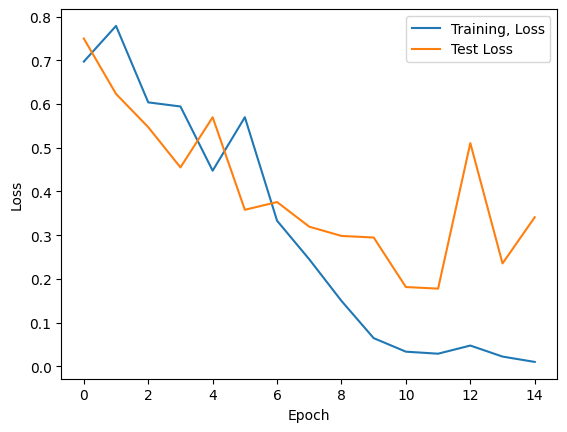

In [38]:
# train the your model

# train the CNN and draw curves

###  "------- add your code here -------"
epochs = 15
epoch_train_loss = []
epoch_test_loss = []

for epoch in range(epochs):
    train_loss = []
    vg_model.train
    for batch_ind, (image, label) in enumerate(train_loader_b):
        image = image.to("cuda")
        label = label.to("cuda")
        optimizer.zero_grad()
        outputs = vg_model(image)

        loss = loss_fun(outputs, label)
        loss.backward()

        optimizer.step()
        train_loss.append(loss.item())
    print(f"Epoch {epoch + 1}/{epochs}, Loss: {np.mean(train_loss):.4f}")
    epoch_train_loss.append(np.mean(train_loss))

    vg_model.eval()
    test_loss = []

    for batch_ind, (image, label) in enumerate(test_loader_b):
      image = image.to("cuda")
      label = label.to("cuda")

      output = vg_model(image)

      loss = loss_fun(output, label)
      test_loss.append(loss.item())

    print(f"Epoch [{epoch+1}/{epochs}], Test Loss: {np.mean(test_loss):.4f}")
    epoch_test_loss.append(np.mean(test_loss))

plt.plot(epoch_train_loss, label='Training, Loss')
plt.plot(epoch_test_loss, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [39]:
# Report the test accuracy on test_loader_b
# ## Requirement on the Test Accuracy: Get a Test Accuracy > 75% to get full marks on this question.
###  "------- add your code here -------"

def calculate_accuracy(model, data_loader, device):
    model.eval()
    correct_predictions = 0
    total_samples = 0

    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)

            # Calculate accuracy
            _, predicted = torch.max(outputs, 1)
            correct_predictions += (predicted == labels).sum().item()
            total_samples += labels.size(0)

    accuracy = correct_predictions / total_samples
    return accuracy

test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1, shuffle=False)

# Calculate accuracy on the test set
test_accuracy = calculate_accuracy(vg_model, test_loader_b, device)
print(f"Test Accuracy: {test_accuracy:.4f}")


Test Accuracy: 0.8788
